In [35]:
import pandas as pd 
import numpy as np
import json
from glob import glob
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

        
        

In [36]:
all_files = glob("data/*.csv")
dataset = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dataset.append(df)
df = pd.concat(dataset, axis=0, ignore_index=True)
#len(df.columns.tolist())
#print(df.head(1))




In [37]:
df['master_category'] = [json.loads(c)['slug'].split('/')[0] for c in df['category'].tolist()]
df['category'] = [json.loads(c)['slug'] for c in df['category'].tolist()]
df['created_at'] = [datetime.fromtimestamp(d) for d in df['created_at'].tolist()]
df['deadline'] = [datetime.fromtimestamp(d) for d in df['deadline'].tolist()]
df['launched_at'] = [datetime.fromtimestamp(d) for d in df['launched_at'].tolist()]
df['currency_trailing_code'][df['currency_trailing_code']] = 1
df['spotlight'][df['spotlight']] = 1
df['staff_pick'][df['staff_pick']] = 1
df['successful'] = 0
df['successful'][df['state']=='successful'] = 1
df['blurb_count'] = [len(str(row).split()) for row in df['blurb'].tolist()]
df['blurb_length'] = [len (str(row))for row in df['blurb'].tolist()]
df ['name_length'] = [len (str(row))for row in df['name'].tolist()]
df ['name_word_count'] = [len(str(row).split()) for row in df['name'].tolist()]

df['funding_duration'] = 0
df ['pre_launch_duration'] = 0
#df['funding_duration'] =[int(str(ddl - lt).split()[0]) for ddl in df['deadline'] and lt in df['launched_at']]




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [38]:
"""for i in range (len (df.index)):
   df ['funding_duration'][i] = (str( df['deadline'][i] - df ['launched_at'][i]).split())[0]
   df ['pre_launch_duration'][i] = (str( df['launched_at'][i] - df ['created_at'][i]).split())[0]


len (df.index)
df['failed'] = 0
df['failed'][df['state']=='failed'] = 1
#print(df['name_length'])

#country to continent
c1=0
c2=0
c3=0
a=[]

for c in df['country_displayable_name'].tolist():
    if c=='the United States' or c=='Canada':
        #df1['continent'] = "USA"
        a.append("USA")
        c1=c1+1
    elif c=='Hong Kong' or c=='Singapore' or c=='Australia':
        #df1['continent'] = "Asia"
        a.append("Asia")
        c2=c2+1
    else: 
        #df1['continent'] = "Europe"
        a.append("Europe")
        c3=c3+1

df['continent'] = a """ 





'for i in range (len (df.index)):\n   df [\'funding_duration\'][i] = (str( df[\'deadline\'][i] - df [\'launched_at\'][i]).split())[0]\n   df [\'pre_launch_duration\'][i] = (str( df[\'launched_at\'][i] - df [\'created_at\'][i]).split())[0]\n\n\nlen (df.index)\ndf[\'failed\'] = 0\ndf[\'failed\'][df[\'state\']==\'failed\'] = 1\n#print(df[\'name_length\'])\n\n#country to continent\nc1=0\nc2=0\nc3=0\na=[]\n\nfor c in df[\'country_displayable_name\'].tolist():\n    if c==\'the United States\' or c==\'Canada\':\n        #df1[\'continent\'] = "USA"\n        a.append("USA")\n        c1=c1+1\n    elif c==\'Hong Kong\' or c==\'Singapore\' or c==\'Australia\':\n        #df1[\'continent\'] = "Asia"\n        a.append("Asia")\n        c2=c2+1\n    else: \n        #df1[\'continent\'] = "Europe"\n        a.append("Europe")\n        c3=c3+1\n\ndf[\'continent\'] = a '

In [39]:
#dropping useless rows
df['state'].unique()
df = df.set_index("state")
df = df.drop("live", axis=0)
df = df.drop("suspended", axis=0)
df = df.drop("canceled", axis=0)
df= df.reset_index()

df.drop_duplicates()


df.to_pickle('data.pkl')
df = pd.read_pickle('data.pkl')
df2= pd.read_pickle('data.pkl')

le = LabelEncoder() 
df2['spotlight']= le.fit_transform(df2['spotlight']) #need to one hot 
df2['is_starrable']= le.fit_transform(df2['is_starrable']) #dont one hot 
df2['currency_symbol'] = le.fit_transform(df2['currency_symbol']) #need to one hot 
df2['master_category'] = le.fit_transform(df2['master_category']) 
#df['continent']= le.fit_transform(df['continent']) #dont label




In [40]:
ohe = OneHotEncoder() 
ohe = pd.get_dummies(df2['spotlight'])
ohe.columns = ['spot_1', 'spot_2' ]
df2 = df2.join (ohe)
df2 = df2.drop ('spotlight', axis = 1)

#ohe = pd.get_dummies(df2['continent'])
#ohe.columns = ['continent_1', 'continent_2', 'continent_3' ]
#df2 = df2.join (ohe)
#df2 = df2.drop ('continent', axis = 1)

ohe = pd.get_dummies(df2['currency_symbol'])
ohe.columns = ['curr_1', 'curr_2', 'curr_3', 'curr_4','curr_5','curr_6' ]
df2 = df2.join (ohe)
df2 = df2.drop ('currency_symbol', axis = 1)

ohe = pd.get_dummies(df2['master_category'])
ohe.columns = ['mas_1', 'mas_2', 'mas_3', 'mas_4','mas_5','mas_6','mas_7', 'mas_8', 'mas_9', 'mas_10','mas_11','mas_12','mas_13','mas_14','mas_15' ]
df2 = df2.join (ohe)
df2 = df2.drop ('master_category', axis = 1)

#dropping unrequired columns from df2
df2 = df2.drop ('blurb', axis = 1)
df2 = df2.drop ('is_starred', axis = 1)
df2 = df2.drop ('friends', axis = 1)
df2 = df2.drop ('country_displayable_name', axis = 1)
df2 = df2.drop ('country', axis = 1)
df2 = df2.drop ('category', axis = 1)
df2 = df2.drop ('urls', axis = 1)
df2 = df2.drop ('source_url', axis = 1)
df2 = df2.drop ('photo', axis = 1)
df2 = df2.drop ('profile', axis = 1)
df2 = df2.drop ('currency_trailing_code', axis = 1)
df2 = df2.drop ('converted_pledged_amount', axis = 1)
df2 = df2.drop ('static_usd_rate', axis = 1)
df2 = df2.drop ('state_changed_at', axis = 1)
df2 = df2.drop ('fx_rate', axis = 1)
df2 = df2.drop ('id', axis = 1)
df2 = df2.drop ('current_currency', axis = 1)
df2 = df2.drop ('is_backing', axis = 1)
df2 = df2.drop ('state', axis = 1)
df2 = df2.drop ('created_at', axis = 1)
df2 = df2.drop ('creator', axis = 1)
df2 = df2.drop ('currency', axis = 1)
df2 = df2.drop ('deadline', axis = 1)
df2 = df2.drop ('disable_communication', axis = 1) #check later
df2 = df2.drop ('permissions', axis = 1) #check later
df2 = df2.drop ('slug', axis = 1) #check later
df2 = df2.drop ('usd_pledged', axis = 1)
df2 = df2.drop ('usd_type', axis = 1)
df2 = df2.drop ('location', axis = 1)
df2 = df2.drop ('launched_at', axis = 1)
df2 = df2.drop ('name', axis = 1)
df2 = df2.drop ('pledged', axis = 1)
#df2 = df2.drop ('failed', axis = 1)




In [42]:
X = df2.drop(["successful"], axis=1)
y = df2["successful"] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15944,  2144],
       [ 4142, 24961]])

In [44]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8667966349515798


Text(0.5, 257.44, 'Predicted label')

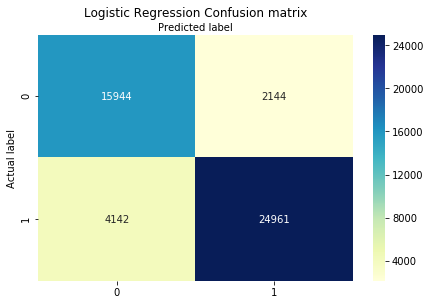

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8667966349515798
Precision: 0.9209002029145914
Recall: 0.8576779026217228


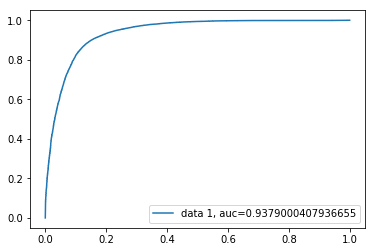

In [48]:
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

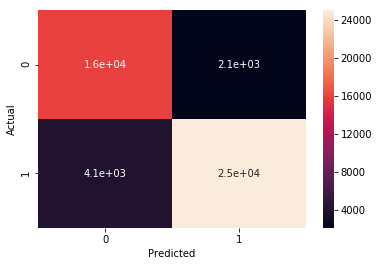

In [49]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [50]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8667966349515798


In [51]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(8, 8))
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,backers_count,goal,is_starrable,staff_pick,blurb_count,blurb_length,name_length,name_word_count,funding_duration,pre_launch_duration,spot_1,spot_2,curr_1,curr_2,curr_3,curr_4,curr_5,curr_6,mas_1,mas_2,mas_3,mas_4,mas_5,mas_6,mas_7,mas_8,mas_9,mas_10,mas_11,mas_12,mas_13,mas_14,mas_15
backers_count,1,0.0123495,nan,0.151847,-0.0127727,0.00343532,0.0436402,0.0408624,nan,nan,-0.124228,0.124228,0.00923153,-0.0019991,-0.000521277,-0.00983839,0.00180696,-0.0019261,-0.0326188,0.0103616,-0.0225951,-0.016191,0.0505374,-0.00680864,-0.020125,-0.0303436,0.116363,-0.0170175,-0.0333498,-0.0187668,-0.0114906,0.0523003,-0.0204645
goal,0.0123495,1,nan,-0.00341502,-0.0022517,-0.000847675,-0.00329864,-0.00486207,nan,nan,0.0359246,-0.0359246,-0.00851153,0.0131045,0.0157842,-0.00906926,0.0789348,0.000121757,-0.00458379,-0.0070456,-0.0034925,-0.00503993,0.00236117,-0.00655328,0.0243264,0.0020554,0.00159878,0.0036016,-0.0115793,-0.00590991,-0.0100082,0.0138473,-0.00308185
is_starrable,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
staff_pick,0.151847,-0.00341502,nan,1,-0.00433297,0.0327339,0.0559441,0.0592504,nan,nan,-0.241123,0.241123,0.00943766,-0.00876643,-0.0101268,0.0070021,0.018585,-0.0204944,-0.0242215,0.0786874,-0.0180713,0.0488369,-0.00895577,-0.0442088,-0.00314768,-0.0258517,-0.00336719,-0.0015547,-0.0336387,0.0191696,0.0648437,-0.0152438,0.00309097
blurb_count,-0.0127727,-0.0022517,nan,-0.00433297,1,0.89644,0.12188,0.146376,nan,nan,0.0622342,-0.0622342,0.0276093,-0.0102495,-0.00551236,0.00698672,-0.0317212,-0.0418401,-0.0312576,0.00538562,-0.00907094,0.017095,-0.0515366,-0.083363,0.0455566,0.0281802,-0.0457842,0.018405,0.0452903,0.0102603,0.00968556,-0.0086713,0.0292327
blurb_length,0.00343532,-0.000847675,nan,0.0327339,0.89644,1,0.183592,0.161988,nan,nan,0.0439158,-0.0439158,0.0148878,-0.00129473,-0.00704493,0.00488638,-0.0156967,-0.0233046,-0.0367892,-0.00184042,-0.01674,0.0413775,-0.0329057,-0.0728303,0.0186116,0.0196902,-0.0474885,0.0330282,-0.00869629,0.0173687,0.0259263,0.0362245,0.040007
name_length,0.0436402,-0.00329864,nan,0.0559441,0.12188,0.183592,1,0.911469,nan,nan,-0.12432,0.12432,0.00303511,0.00288987,-0.0112565,-0.014302,0.0230228,0.0134491,-0.00633546,-0.00784619,-0.0113733,0.00105559,0.0627046,0.0489496,-0.146569,-0.0286356,-0.0311622,-0.0233428,0.0260881,-0.00837849,0.0354519,0.107646,-0.00709521
name_word_count,0.0408624,-0.00486207,nan,0.0592504,0.146376,0.161988,0.911469,1,nan,nan,-0.14427,0.14427,0.00280913,-0.000101727,-0.0131821,-0.00373139,0.0131716,0.0039195,-0.0134585,0.0129225,-0.0259055,-0.00765036,0.0461271,0.0332624,-0.108949,-0.0309708,-0.0295178,-0.0323046,0.0531329,-0.0111545,0.0416598,0.0628764,-0.000569797
funding_duration,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pre_launch_duration,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
